In [57]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
jtplot.style()

#now load this dataset 
h5f = h5py.File('./datasets/s16_d_siti_2.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]

Y = Y / 100.0
X = X*2 - 1


#get the ranges of the loaded data
num_layers = X.shape[1]
num_lpoints = Y.shape[1]


#this information is not given in the dataset
lam_min = 400
lam_max = 800
lams = np.linspace(lam_min, lam_max, num_lpoints, endpoint=True)

#create a train - test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print("Dataset has been loaded")
print("x-train", x_train.shape)
print("x-test ", x_test.shape)
print("y-train", y_train.shape)
print("y-test ", y_test.shape)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has been loaded
x-train (180000, 16)
x-test  (20000, 16)
y-train (180000, 128)
y-test  (20000, 128)


array([ 0.93503673, -0.63129639, -0.32914863, -0.39642248,  0.6034896 ,
       -0.42785669,  0.40668602,  0.12134943,  0.16664638, -0.08531775,
       -0.55238342,  0.36449522,  0.65747872, -0.57561007,  0.04765327,
        0.96556356])

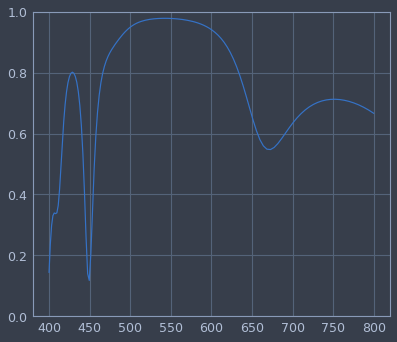

In [59]:
lam_inv = np.linspace(1/400.0, 1/800.0, num=num_lpoints, endpoint=True)
lams = 1.0/lam_inv

plt.plot( lams, y_train[ np.random.randint(0, 9000)    ]  )
plt.ylim(  [0, 1])

x_train[0]

In [93]:
import scnets as scn
model = scn.fullycon(in_size=16, 
                     out_size=128, 
                     batch_size=64,
                     N_hidden=3, 
                     N_neurons=128, 
                     N_gpus=3)

model.summary()    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 128)               2176      
_________________________________________________________________
activation_35 (Activation)   (None, 128)               0         
_________________________________________________________________
H0 (Dense)                   (None, 128)               16512     
_________________________________________________________________
activation_36 (Activation)   (None, 128)               0         
_________________________________________________________________
H1 (Dense)                   (None, 128)               16512     
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
H2 (Dense)                   (None, 128)               16512     
__________

In [94]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=200, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 180000 samples, validate on 20000 samples
Epoch 1/200
  2048/180000 [..............................] - ETA: 22s - loss: 1067.9223 - calc_mre_K: 0.3911

/home/hegder/anaconda3/lib/python3.7/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


180000/180000 [==============================] - 14s 76us/step - loss: 586.6970 - calc_mre_K: 0.2149 - val_loss: 486.2231 - val_calc_mre_K: 0.1782
Epoch 2/200
180000/180000 [==============================] - 13s 73us/step - loss: 425.6830 - calc_mre_K: 0.1559 - val_loss: 387.3521 - val_calc_mre_K: 0.1420
Epoch 3/200
180000/180000 [==============================] - 13s 74us/step - loss: 356.6724 - calc_mre_K: 0.1306 - val_loss: 323.5688 - val_calc_mre_K: 0.1186
Epoch 4/200
180000/180000 [==============================] - 13s 74us/step - loss: 303.3858 - calc_mre_K: 0.1111 - val_loss: 283.9960 - val_calc_mre_K: 0.1041
Epoch 5/200
180000/180000 [==============================] - 13s 74us/step - loss: 269.8481 - calc_mre_K: 0.0988 - val_loss: 264.3996 - val_calc_mre_K: 0.0969
Epoch 6/200
180000/180000 [==============================] - 13s 74us/step - loss: 250.0728 - calc_mre_K: 0.0916 - val_loss: 243.8528 - val_calc_mre_K: 0.0894
Epoch 7/200
180000/180000 [==============================]

180000/180000 [==============================] - 14s 75us/step - loss: 138.0892 - calc_mre_K: 0.0506 - val_loss: 140.6725 - val_calc_mre_K: 0.0516
Epoch 53/200
180000/180000 [==============================] - 13s 75us/step - loss: 137.7028 - calc_mre_K: 0.0504 - val_loss: 138.8589 - val_calc_mre_K: 0.0509
Epoch 54/200
180000/180000 [==============================] - 13s 73us/step - loss: 137.3089 - calc_mre_K: 0.0503 - val_loss: 138.8965 - val_calc_mre_K: 0.0509
Epoch 55/200
180000/180000 [==============================] - 13s 75us/step - loss: 136.9568 - calc_mre_K: 0.0502 - val_loss: 138.5185 - val_calc_mre_K: 0.0508
Epoch 56/200
180000/180000 [==============================] - 13s 75us/step - loss: 136.6009 - calc_mre_K: 0.0500 - val_loss: 138.7215 - val_calc_mre_K: 0.0508
Epoch 57/200
180000/180000 [==============================] - 13s 72us/step - loss: 136.0806 - calc_mre_K: 0.0498 - val_loss: 138.3350 - val_calc_mre_K: 0.0507
Epoch 58/200
180000/180000 [=========================

180000/180000 [==============================] - 14s 77us/step - loss: 115.8097 - calc_mre_K: 0.0424 - val_loss: 118.3356 - val_calc_mre_K: 0.0434
Epoch 104/200
180000/180000 [==============================] - 13s 73us/step - loss: 115.4539 - calc_mre_K: 0.0423 - val_loss: 118.5177 - val_calc_mre_K: 0.0434
Epoch 105/200
180000/180000 [==============================] - 13s 72us/step - loss: 115.3549 - calc_mre_K: 0.0422 - val_loss: 117.6739 - val_calc_mre_K: 0.0431
Epoch 106/200
180000/180000 [==============================] - 14s 75us/step - loss: 115.3671 - calc_mre_K: 0.0423 - val_loss: 117.9273 - val_calc_mre_K: 0.0432
Epoch 107/200
180000/180000 [==============================] - 13s 74us/step - loss: 115.1121 - calc_mre_K: 0.0422 - val_loss: 118.1231 - val_calc_mre_K: 0.0433
Epoch 108/200
180000/180000 [==============================] - 13s 73us/step - loss: 115.0414 - calc_mre_K: 0.0421 - val_loss: 117.0860 - val_calc_mre_K: 0.0429
Epoch 109/200
180000/180000 [===================

Epoch 154/200
180000/180000 [==============================] - 14s 75us/step - loss: 110.8464 - calc_mre_K: 0.0406 - val_loss: 115.1649 - val_calc_mre_K: 0.0422
Epoch 155/200
180000/180000 [==============================] - 14s 77us/step - loss: 110.7531 - calc_mre_K: 0.0406 - val_loss: 112.3627 - val_calc_mre_K: 0.0412
Epoch 156/200
180000/180000 [==============================] - 14s 76us/step - loss: 110.7424 - calc_mre_K: 0.0406 - val_loss: 113.4726 - val_calc_mre_K: 0.0416
Epoch 157/200
180000/180000 [==============================] - 13s 74us/step - loss: 110.7128 - calc_mre_K: 0.0405 - val_loss: 115.1285 - val_calc_mre_K: 0.0422
Epoch 158/200
180000/180000 [==============================] - 14s 75us/step - loss: 110.7458 - calc_mre_K: 0.0406 - val_loss: 115.5896 - val_calc_mre_K: 0.0424
Epoch 159/200
180000/180000 [==============================] - 13s 75us/step - loss: 110.7272 - calc_mre_K: 0.0406 - val_loss: 115.1904 - val_calc_mre_K: 0.0422
Epoch 160/200
180000/180000 [=====

[-0.8568308   0.95530558  0.55021432  0.57709433  0.51667057 -0.13719201
  0.10193289 -0.09344975  0.67611094 -0.57865021 -0.89294536 -0.11672836
 -0.23931468  0.93205126 -0.5196566   0.98282012]


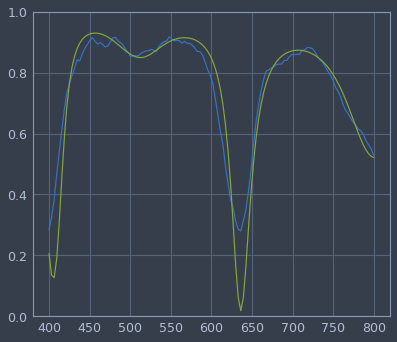

In [169]:
numbr = np.random.randint(0,2000)
lams = np.linspace(400, 800, endpoint=True, num=128)
yz = model.predict(x_test[numbr:numbr+3])
plt.plot( lams,  yz[0])
plt.plot( lams, y_test[numbr])
plt.ylim([0,1])
print(x_test[numbr])

In [111]:
test = np.array([  1.55886594,  48.2155035,   85.86266944,  40.18463303,  41.39958257,
  40.9130793   90.7680843   50.48189625 100.          74.36306673
  99.93251134  99.99088077  99.88496324  67.78092403 100.
  92.1395581 ])

SyntaxError: invalid syntax (<ipython-input-111-d8901bf549c6>, line 1)

In [140]:

pt = np.array([ 0.79899497,  1.        , -0.79899497, -0.95979899,  0.42713568,
       -1.        ,  1.        ,  1.        ,  0.63819095, -1.        ,
        1.        , -0.59798995, -0.86934673,  0.68844221, -0.34673367,
       -0.77889447])

In [185]:
ttt = np.tile(pt, (15,1))

(0, 10)

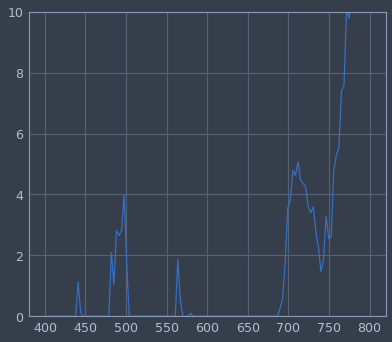

In [186]:
zg = model.predict(ttt)
plt.plot(lams, 100*zg[0])
plt.ylim([0,10] )

In [170]:
# Import the save_mxnet_model API
from keras.models import save_mxnet_model
save_mxnet_model(model=model, prefix='siti_fully', epoch=0)

MXNet Backend: Successfully exported the model as MXNet model!
MXNet symbol file -  siti_fully-symbol.json
MXNet params file -  siti_fully-0000.params


Model input data_names and data_shapes are: 
data_names :  ['/first_input9']
data_shapes :  [DataDesc[/first_input9,(3, 16),float32,NCHW]]


Note: In the above data_shapes, the first dimension represent the batch_size used for model training. 
You can change the batch_size for binding the module based on your inference batch_size.


(['/first_input9'], [DataDesc[/first_input9,(3, 16),float32,NCHW]])

In [172]:
import numpy as np
import mxnet as mx

# Step1: Load the model in MXNet

# Use the same prefix and epoch parameters we used in save_mxnet_model API.
sym, arg_params, aux_params = mx.model.load_checkpoint(prefix='siti_fully', epoch=0)

In [187]:
# We use the data_names and data_shapes returned by save_mxnet_model API.
mod = mx.mod.Module(symbol=sym, 
                    data_names=['/first_input9'], 
                    context=mx.gpu(), 
                    label_names=None)
mod.bind(for_training=False, 
         data_shapes=[('/first_input9', (3,16))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)

#data_iter = mx.io.NDArrayIter(x_test, None, 1)
data_iter = mx.io.NDArrayIter(ttt, None, 1)
res2 = mod.predict(data_iter).asnumpy()

(0, 100)

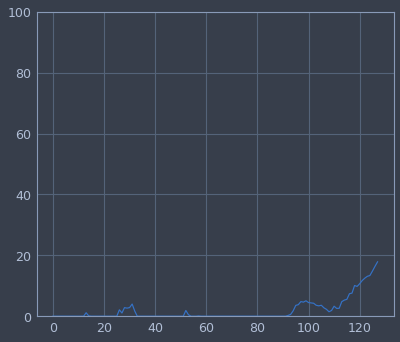

In [189]:
plt.plot(100*res2[0])
plt.ylim ( [0,100])